In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

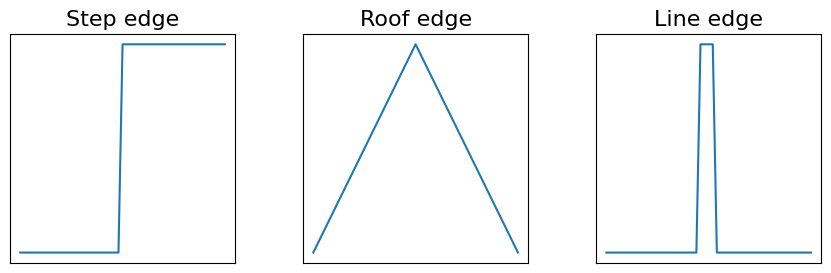

In [40]:
# Edge profiles

step = np.linspace(0, 50, 50+1)
step[:25] = 0
step[25:] = 1

roof = np.linspace(0, 50, 50+1)
roof[:25] /= 25
roof[25:] = (50 - roof[25:]) / 25

line = np.linspace(0, 50, 50+1)
line[:23] = 0
line[23:27] = 1
line[27:] = 0

fig, axs = plt.subplots(1,3)
fig.set_figheight(3)
fig.set_figwidth(9)
fig.tight_layout(pad=1.5)
axs[0].plot(step)
axs[0].set_title('Step edge', fontsize=16)
axs[1].plot(roof)
axs[1].set_title('Roof edge', fontsize=16)
axs[2].plot(line)
axs[2].set_title('Line edge', fontsize=16)
for i in range(3):
    axs[i].get_xaxis().set_ticks([])
    axs[i].get_yaxis().set_ticks([])
plt.show()
fig.savefig('edge_types.pdf', format='pdf')

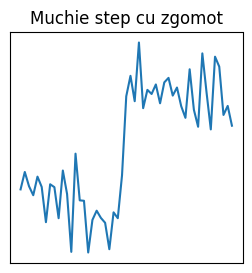

In [39]:
# Noisy step edge

step += np.random.normal(0, 1, size=50+1) / 6

fig, axs = plt.subplots()
fig.set_figheight(3)
fig.set_figwidth(3)
axs.plot(step)
axs.get_xaxis().set_ticks([])
axs.get_yaxis().set_ticks([])
axs.set_title('Muchie step cu zgomot')
plt.savefig('noisy_step_edge.pdf', format='pdf')

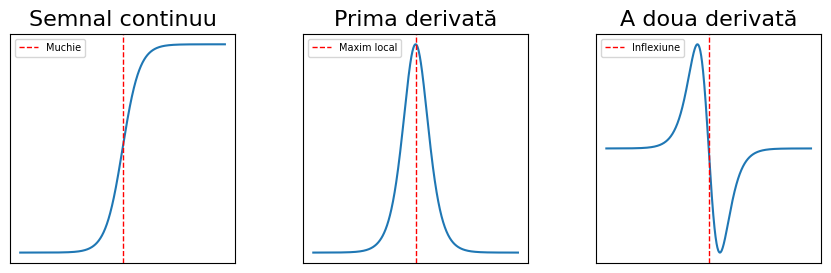

In [37]:
# Continuous 1d signal (parameterized sigmoid)

x = np.linspace(-3, 3, 1000)

c = 4
f = 1 / (1+np.exp(-c*x))
f_1 = (c*np.exp(-c*x)) / (np.exp(-c*x)+1)**2
f_2 = (2*c**2*np.exp(-2*c*x)) / (np.exp(-c*x)+1)**3 - (c**2*np.exp(-c*x))/ (np.exp(-c*x)+1)**2

fig, axs = plt.subplots(1,3)
fig.set_figheight(3)
fig.set_figwidth(9)
fig.tight_layout(pad=1.5)
axs[0].plot(x, f)
axs[0].set_title('Semnal continuu', fontsize=16)
axs[0].axvline(x=0, color='r', ls='--', lw=1, label='Muchie')
axs[1].plot(x, f_1)
axs[1].set_title('Prima derivată', fontsize=16)
axs[1].axvline(x=0, color='r', ls='--', lw=1, label='Maxim local')
axs[2].plot(x, f_2)
axs[2].set_title('A doua derivată', fontsize=16)
axs[2].axvline(x=0, color='r', ls='--', lw=1, label='Inflexiune')
for i in range(3):
    axs[i].get_xaxis().set_ticks([])
    axs[i].get_yaxis().set_ticks([])
    axs[i].legend(loc='upper left', prop={'size': 7})
plt.show()
fig.savefig('1d_signal.pdf', format='pdf')

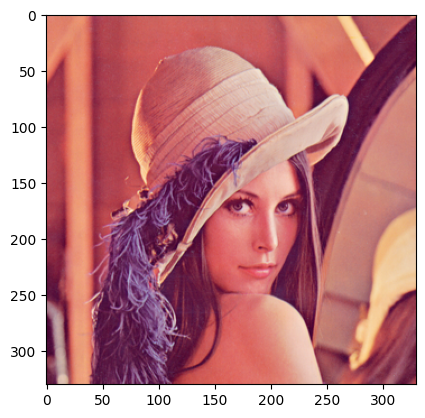

In [6]:
# Common filters

lenna_orig = cv.imread("lenna.png")
plt.imshow(lenna_orig[:,:,::-1], cmap="gray") # OpenCV uses BGR instead of RGB

In [7]:
# Prewitt
prewitt_x = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewitt_y = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

# Sobel
sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

# Laplace
laplace = np.array([[0,1,0],[1,-4,1],[0,1,0]])

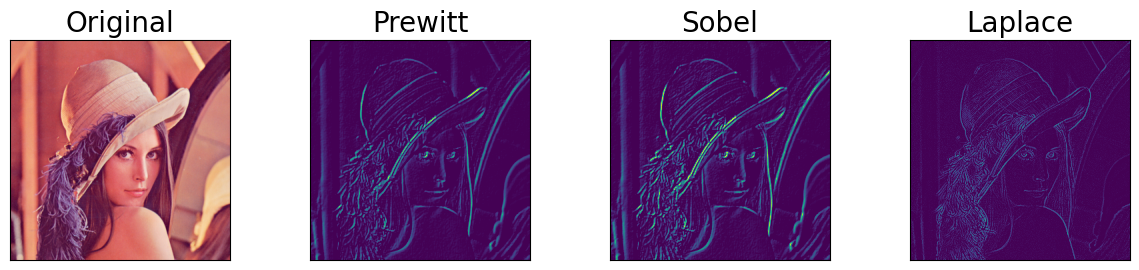

In [41]:
# Convolution

lenna_gray = cv.cvtColor(lenna_orig, cv.COLOR_BGR2GRAY)

lenna_prewitt = cv.filter2D(lenna_gray, -1, (prewitt_x+prewitt_y)/2)
lenna_sobel = cv.filter2D(lenna_gray, -1, (sobel_x+sobel_y)/2)
lenna_laplace = cv.filter2D(lenna_gray, -1, laplace)

fig, axs = plt.subplots(1,4)
fig.tight_layout(pad=0)
fig.set_figheight(3)
fig.set_figwidth(12)

axs[0].imshow(lenna_orig[:,:,::-1])
axs[0].set_title('Original', fontsize=20)
axs[1].imshow(lenna_prewitt)
axs[1].set_title('Prewitt', fontsize=20)
axs[2].imshow(lenna_sobel)
axs[2].set_title('Sobel', fontsize=20)
axs[3].imshow(lenna_laplace)
axs[3].set_title('Laplace', fontsize=20)
for i in range(4):
    axs[i].get_xaxis().set_ticks([])
    axs[i].get_yaxis().set_ticks([])

fig.savefig('filters.pdf', format='pdf')

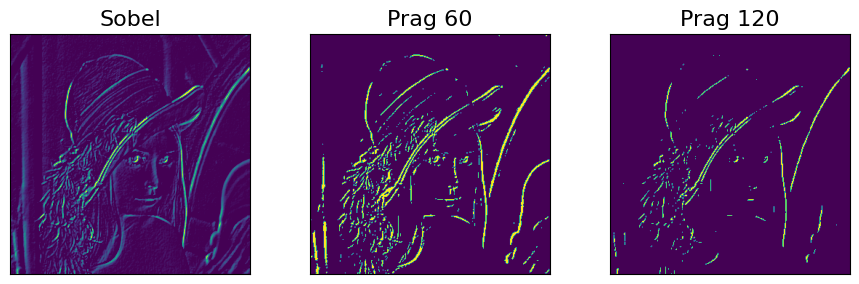

In [35]:
# Thresholding

lenna_tr1 = cv.threshold(lenna_sobel, 60, 256, cv.THRESH_BINARY)[1]
lenna_tr2 = cv.threshold(lenna_sobel, 120, 256, cv.THRESH_BINARY)[1]

fig, axs = plt.subplots(1,3)
fig.tight_layout(pad=0)
fig.set_figheight(3)
fig.set_figwidth(9)

axs[0].imshow(lenna_sobel)
axs[0].set_title('Sobel', fontsize=16)
axs[1].imshow(lenna_tr1)
axs[1].set_title('Prag 60', fontsize=16)
axs[2].imshow(lenna_tr2)
axs[2].set_title('Prag 120', fontsize=16)
for i in range(3):
    axs[i].get_xaxis().set_ticks([])
    axs[i].get_yaxis().set_ticks([])

fig.savefig('thresholding.pdf', format='pdf')